MATH 317 Lab Assignment 4   
Dec 1, 2023   
Thomas Cole, 260904382  

In [1]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt

## **Question 1)**

In this question we implement and examine linear regression using plain gradient descent. We will look at the parameteric error, training loss, testing loss, a contour plot of our gradient descent algorithm, examine the effect of learning rate on our function, examine the effect of intial parameters and finally the effect size of the training data.

#### **Class Definition: Linear Regression with Gradient Descent**

Below we have the decleration of our gradient descent algorithm for linear regression. We will use this to peform the analysis previously mentioned.

In [11]:
class GD_LR:

    def __init__(self,w0,w1,learn_rate,iterations):

        # intialize parameters
        self.w0 = w0
        self.w1 = w1
        self.l_w0 = [w0]
        self.l_w1 = [w1]
        self.iterations = iterations
        self.learn_rate = learn_rate

        # intialize other data
        self.train_loss = list()
        self.test_loss = list()
        self.epochs = list()
        self.parametric_e = list()

    def loss(self,y,y_pred):
        # using MSE as cost function.
        return np.sum((y - y_pred)**2) / (2*len(y))

    def parmetric_eror(self):

        # calculate of parametric error as Euclidean Distance.
        return np.sqrt((self.w0t - self.w0)**2 + (self.w1t -self.w1)**2)
    
    def fit(self,xs,ys):

        # true value via algebraic solutions
        self.w0t = (len(xs)*np.sum(xs*ys) - np.sum(xs)*np.sum(ys)) / (len(xs)*np.sum(xs**2) - np.sum(xs)**2)
        self.w1t = (np.sum(ys) - self.w0t*(np.sum(xs))) / len(xs)

        # split training and testing data, split 80-20.
        splitval = int(len(xs)*0.8)
        xs_test = xs[splitval:]
        xs = xs[:splitval]

        ys_test = ys[splitval:]
        ys = ys[:splitval]

        n = len(xs)

        # Compute Gradient Descent
        for i in range(self.iterations):
        
            # predict y-values
            y_pred = self.w0 + self.w1*xs

            # calculate loss

            # train loss
            cost = self.loss(ys,y_pred)
            self.train_loss.append(cost)

            # test loss
            cost = self.loss(ys_test,self.w0 + self.w1*xs_test)
            self.test_loss.append(cost)
            
            # add parametric error
            self.parametric_e.append(self.parmetric_eror())

            self.epochs.append(i)

            # calcualte gradients
            w0_deriv = (1/n) * np.sum(y_pred - ys)
            w1_deriv = (1/n) * np.sum(xs*(y_pred - ys))
            
            # update values
            self.w0 = self.w0 - self.learn_rate*w0_deriv
            self.w1 = self.w1 - self.learn_rate*w1_deriv

            self.l_w0.append(self.w0)
            self.l_w1.append(self.w1)

    


### **Testing**

#### Testing Data

Below we intialize the testing data that will be used throughout the section. Please not that I have set the random seed to 1 for consistency in commentary and results.

In [19]:
# helper function
def sample(f,sample_size = 100,seed = 1):
    np.random.seed(seed)
    xs = np.random.uniform(-1,1,sample_size)
    ys = f(xs) + np.random.normal(0,1,sample_size)
    return xs,ys

# target function
def F(x):
    return np.exp(x)

# Sample Values
xs,ys = sample(F,1000,1)

#### Comparison with Exact Parameters

In [34]:
gd = GD_LR(w0 = 0,w1 = 0,learn_rate = 0.01,iterations= 1000)
gd.fit(xs,ys)
print("Estimated w0: " + str(gd.w0) + "\nEstimated w1: " + str(gd.w1))
print("True w0: " + str(gd.w0t) + "\nTrue w1: " + str(gd.w1t))


Estimated w0: 1.2274833964471221
Estimated w1: 1.0608350948403096
True w0: 1.1033870677036544
True w1: 1.2214681653201183


**CHECK THIS WHAT IS WRONG

The above shows that our gradient descent algorithm has produced values fairly close to the original parameters.

#### **Error Plots**

We now examine the various error plots. To do this, we perform the gradient descent method at varying levels of the learning rate.

In [59]:
# n = 0.9
gdlr09 = GD_LR(0,0,0.9,1000)
gdlr09.fit(xs,ys)

# n = 0.5
gdlr05 = GD_LR(0,0,0.5,1000)
gdlr05.fit(xs,ys)

# n = 0.1
gdlr01 = GD_LR(0,0,0.1,1000)
gdlr01.fit(xs,ys)

# n = 0.05
gdlr005 = GD_LR(0,0,0.05,1000)
gdlr005.fit(xs,ys)

# n = 0.01
gdlr001 = GD_LR(0,0,0.01,1000)
gdlr001.fit(xs,ys)

#### Parametric Error

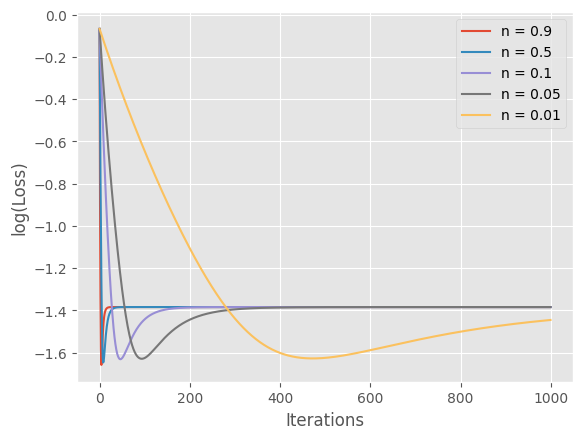

In [60]:
plt.style.use("ggplot")
plt.plot(gdlr09.epochs,np.log(gdlr09.parametric_e), label = "n = 0.9")
plt.plot(gdlr05.epochs,np.log(gdlr05.parametric_e), label = "n = 0.5")
plt.plot(gdlr01.epochs,np.log(gdlr01.parametric_e), label = "n = 0.1")
plt.plot(gdlr005.epochs,np.log(gdlr005.parametric_e), label = "n = 0.05")
plt.plot(gdlr001.epochs,np.log(gdlr001.parametric_e), label = "n = 0.01")
plt.xlabel("Iterations")
plt.ylabel("log(Loss)")
plt.legend()
plt.show()

#### Training Loss

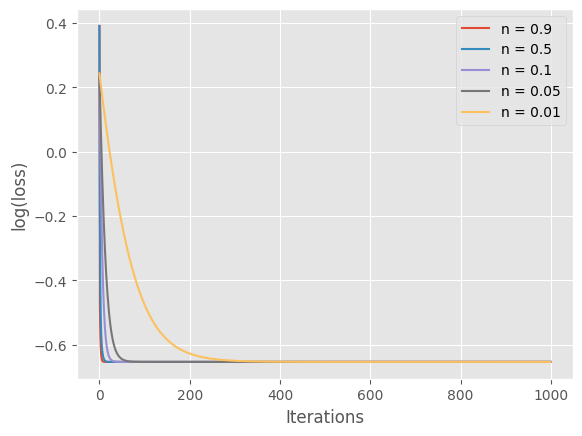

In [40]:
plt.style.use("ggplot")
plt.plot(gdlr09.epochs,np.log(gdlr09.train_loss), label = "n = 0.9")
plt.plot(gdlr05.epochs,np.log(gdlr05.train_loss), label = "n = 0.5")
plt.plot(gdlr01.epochs,np.log(gdlr01.train_loss), label = "n = 0.1")
plt.plot(gdlr005.epochs,np.log(gdlr005.train_loss), label = "n = 0.05")
plt.plot(gdlr001.epochs,np.log(gdlr001.train_loss), label = "n = 0.01")
plt.xlabel("Iterations")
plt.ylabel("log(loss)")
plt.legend()
plt.show()

#### Test Loss

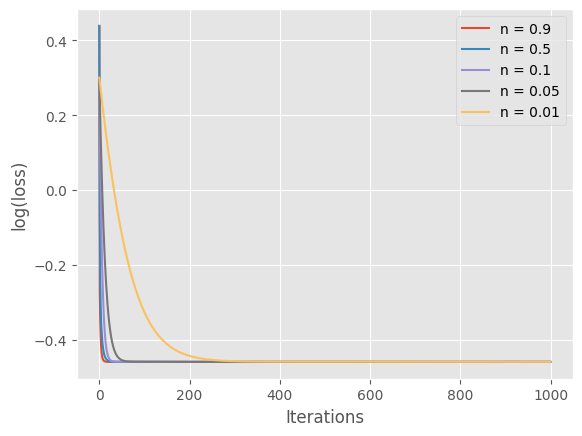

In [41]:
plt.style.use("ggplot")
plt.plot(gdlr09.epochs,np.log(gdlr09.test_loss), label = "n = 0.9")
plt.plot(gdlr05.epochs,np.log(gdlr05.test_loss), label = "n = 0.5")
plt.plot(gdlr01.epochs,np.log(gdlr01.test_loss), label = "n = 0.1")
plt.plot(gdlr005.epochs,np.log(gdlr005.test_loss), label = "n = 0.05")
plt.plot(gdlr001.epochs,np.log(gdlr001.test_loss), label = "n = 0.01")
plt.xlabel("Iterations")
plt.ylabel("log(loss)")
plt.legend()
plt.show()

From the above graphs we can clearly see the effec that the learning rate has on our cost function and ultimately the quality of our regression. More specifically we might suggest that a learning rate of around 0.1 to 0.05 is the best. This is inline with traditional literature as well. Note however, that we only tested this on sample size of 100. We will examine further later, the effect that a changing sample size can have on this decision. 

#### **Contour Plot**

We now examine the effect of intial values on our gradient descent algorithm by plotting the contour plot and our gradient descent path for various intial w0 and w1.

Data

In [42]:
# intialize different starting values
cdg00 = GD_LR(w0 = 0,w1 = 0,learn_rate = 0.01,iterations = 1000)
cdg01 = GD_LR(w0 = 0,w1 = 1,learn_rate = 0.01,iterations = 1000)
cdg55 = GD_LR(w0 = 5,w1 = 5,learn_rate = 0.01,iterations = 1000)
cdg44 = GD_LR(w0 = -4,w1 = -4,learn_rate = 0.01,iterations = 1000)

# fit regressions
cdg00.fit(xs,ys)
cdg01.fit(xs,ys)
cdg55.fit(xs,ys)
cdg44.fit(xs,ys)

# define cost function
def cost(w0,w1,xs,ys):
    y_pred = w0 + w1*xs
    return np.sum((ys - y_pred)**2) / (2*len(ys))

# get final values from first iteration to create grid
w0vals = np.linspace(-5*gdlr001.w0,5*gdlr001.w0,100)
w1vals = np.linspace(-5*gdlr001.w1,5*gdlr001.w1,100)
cost_vals = np.zeros((len(w0vals), len(w1vals)))

# get cost values over grid
c1=0; c2=0
for i in w0vals:
    for j in w1vals:
        cost_vals[c1][c2] = cost(i,j,xs,ys)
        c2=c2+1
    c1=c1+1
    c2=0

Plot

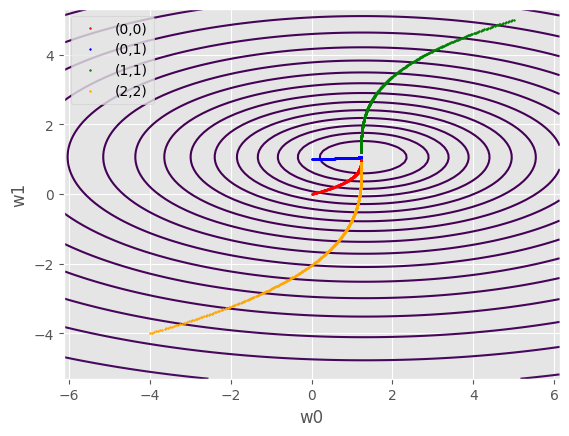

In [44]:
plt.style.use("ggplot")
plt.contour(w0vals, w1vals, cost_vals,levels = np.logspace(-2,3,50))
plt.xlabel('w0'); plt.ylabel("w1")
plt.plot(cdg00.l_w0, cdg00.l_w1, '+',color = "red",markersize = 2,label = "(0,0)")
plt.plot(cdg01.l_w0, cdg01.l_w1, '+',color = "blue",markersize = 2, label = "(0,1)")
plt.plot(cdg55.l_w0, cdg55.l_w1, '+',color = "green",markersize = 2, label = "(5,5)")
plt.plot(cdg44.l_w0, cdg44.l_w1, '+',color = "orange",markersize = 2, label = "(-4,-4)")
plt.legend()
plt.show()

From this plot we can see that varying the initial conditions does not greatly affect our gradient descent algorithm. As a result, we might choose to make an educated guess so that we could converge quicker. 

#### **Sample Size Effect**

Finally, we examine the effect of sample size on the quality of our regression. We utilize the previously discovered results, a learning rate of 0.05, and a intial starting conditon of (0,0). We will also use 100 iterations.

In [46]:
xs10,ys10 = sample(F,10)
xs50,ys50 = sample(F,50)
xs100,ys100 = sample(F,100)
xs200,ys200 = sample(F,200)
xs500,ys500 = sample(F,500)

gd10 = GD_LR(0,0,0.1,100)
gd10.fit(xs10,ys10)

gd50 = GD_LR(0,0,0.1,100)
gd50.fit(xs50,ys50)

gd100 = GD_LR(0,0,0.1,100)
gd100.fit(xs100,ys100)

gd200 = GD_LR(0,0,0.1,100)
gd200.fit(xs200,ys200)

gd500 = GD_LR(0,0,0.1,100)
gd500.fit(xs500,ys500)

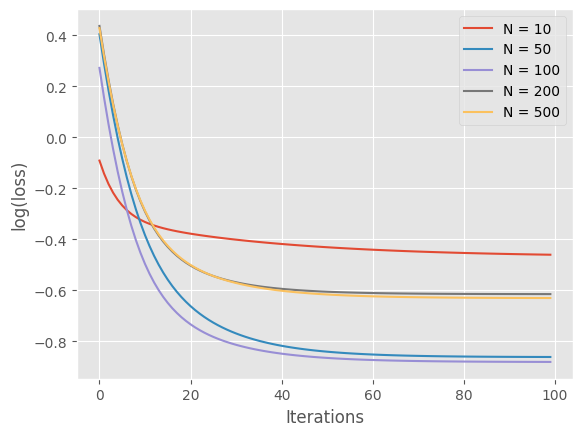

In [49]:
plt.style.use("ggplot")
plt.plot(gd10.epochs,np.log(gd10.train_loss), label = "N = 10")
plt.plot(gd50.epochs,np.log(gd50.train_loss), label = "N = 50")
plt.plot(gd100.epochs,np.log(gd100.train_loss), label = "N = 100")
plt.plot(gd200.epochs,np.log(gd200.train_loss), label = "N = 200")
plt.plot(gd500.epochs,np.log(gd500.train_loss), label = "N = 500")
plt.xlabel("Iterations")
plt.ylabel("log(loss)")
plt.legend()
plt.show()

From this graph we might gather that we gain very little interms of reduced cost when we expand our sample size beyond 200, as its loss graph is nearly the same as 500. That said, we can also see that the sample sizes of 50 and 100 perform the best, both of which are less than or equal to the number of iterations.

**Summary**

commentary**

## **Question 2)**

In this question, we perform similar analysis to the above exercise but instead using logistic regression. We will look at training loss, testing loss, a contour plot of our gradient descent algorithm, examine the effect of learning rate on our function, the effect of intial parameters and finally the of effect training data size.

#### **Class Definition: Logistic Regression with Gradient Descent**

Below we have the decleration of our gradient descent algorithm for logistic regression. We will use this to peform the analysis previously mentioned.

In [61]:
class GD_LogR:

    def __init__(self,w0,w1,learn_rate,iterations):

        # intial params
        self.w0 = w0
        self.w1 = w1
        self.l_w0 = [w0]
        self.l_w1 = [w1]
        self.learn_rate = learn_rate
        self.iterations = iterations

        # intialize values
        self.train_loss = list()
        self.test_loss = list()
        self.epochs = list()

    
    def loss(self,y,y_pred):
        logPred = np.log(y_pred)
        logOneMinusPred = np.log(1-y_pred)

        return -1/len(y_pred)*np.sum(((y*logPred) + (1-y)*(logOneMinusPred)))
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self,xs,ys):
           
        # split training and testing data
        splitval = int(len(xs)*0.8)
        xs_test = xs[splitval:]
        xs = xs[:splitval]

        ys_test = ys[splitval:]
        ys = ys[:splitval]

        n = len(xs)

        # perform gradient descent
        for i in range(self.iterations):
            
            # predict y-values
            y_pred = self.sigmoid(self.w0 + self.w1*xs)
            y_test_pred = self.sigmoid(self.w0 + self.w1*xs_test)
            
            # calculate loss
            # train loss
            cost = self.loss(ys,y_pred)
            self.train_loss.append(cost)

            # test loss
            cost = self.loss(ys_test,y_test_pred)
            self.test_loss.append(cost)

            self.epochs.append(i)

            # calculate gradients
            w0_deriv = (1/n) * np.sum(y_pred - ys)
            w1_deriv = (1/n) * np.sum(xs*(y_pred - ys))

            # update parameters
            self.w0 = self.w0 - self.learn_rate*w0_deriv
            self.w1 = self.w1 - self.learn_rate*w1_deriv

            self.l_w0.append(self.w0)
            self.l_w1.append(self.w1)

### **Testing**

#### Testing Data

Below we intialize the testing data that will be used throughout the section. Please not that I have set the random seed to 1 for consistency in commentary and results.

In [70]:
# target function
def F(x): 
    return (x + np.abs(x)) / (2*x)

# Sample Values
xs,ys = sample(F,1000,1)

#### **Error Plots**

We now examine the various error plots. To do this, we perform the gradient descent method at varying levels of the learning rate.

In [71]:
# n = 0.9
gdlogr09 = GD_LogR(0,0,0.9,1000)
gdlogr09.fit(xs,ys)

# n = 0.5
gdlogr05 = GD_LogR(0,0,0.5,1000)
gdlogr05.fit(xs,ys)

# n = 0.1
gdlogr01 = GD_LogR(0,0,0.1,1000)
gdlogr01.fit(xs,ys)

# n = 0.05
gdlogr005 = GD_LogR(0,0,0.05,1000)
gdlogr005.fit(xs,ys)

# n = 0.01
gdlogr001 = GD_LogR(0,0,0.01,1000)
gdlogr001.fit(xs,ys)

#### Training Loss

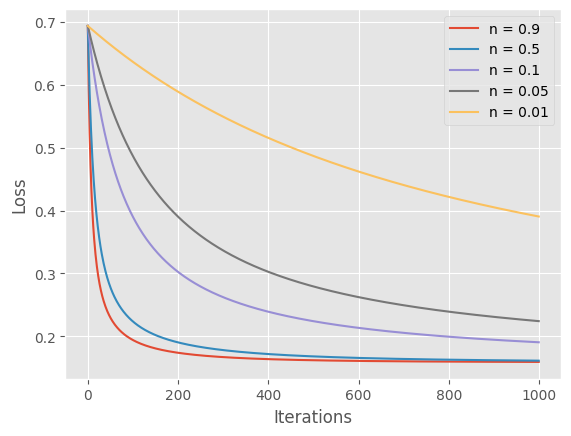

In [67]:
plt.style.use("ggplot")
plt.plot(gdlogr09.epochs,gdlogr09.train_loss, label = "n = 0.9")
plt.plot(gdlogr05.epochs,gdlogr05.train_loss, label = "n = 0.5")
plt.plot(gdlogr01.epochs,gdlogr01.train_loss, label = "n = 0.1")
plt.plot(gdlogr005.epochs,gdlogr005.train_loss, label = "n = 0.05")
plt.plot(gdlogr001.epochs,gdlogr001.train_loss, label = "n = 0.01")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.legend()
plt.show()

#### Test Loss

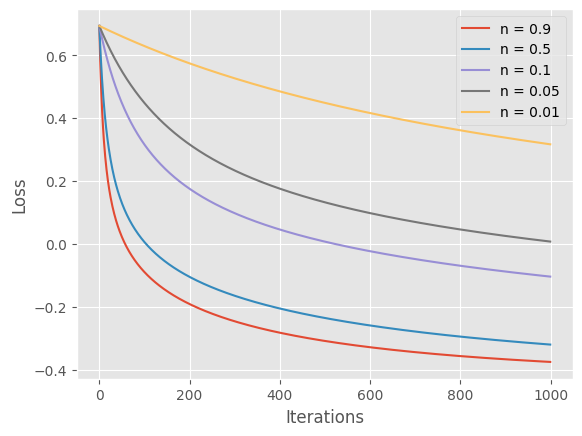

In [66]:
plt.style.use("ggplot")
plt.plot(gdlogr09.epochs,gdlogr09.test_loss, label = "n = 0.9")
plt.plot(gdlogr05.epochs,gdlogr05.test_loss, label = "n = 0.5")
plt.plot(gdlogr01.epochs,gdlogr01.test_loss, label = "n = 0.1")
plt.plot(gdlogr005.epochs,gdlogr005.test_loss, label = "n = 0.05")
plt.plot(gdlogr001.epochs,gdlogr001.test_loss, label = "n = 0.01")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

Commentary on all of the above.

#### **Contour Plot**

We now examine the effect of intial values on our gradient descent algorithm by plotting the contour plot and our gradient descent path for various intial w0 and w1.

Data

In [87]:
cdg00 = GD_LogR(w0 = 0,w1 = 0,learn_rate = 0.01,iterations = 1000)
cdg01 = GD_LogR(w0 = 0,w1 = 1,learn_rate = 0.01,iterations = 1000)
cdg11 = GD_LogR(w0 = 1,w1 = 1,learn_rate = 0.01,iterations = 1000)
cdg22 = GD_LogR(w0 = -2,w1 = -2,learn_rate = 0.01,iterations = 1000)

cdg00.fit(xs,ys)
cdg01.fit(xs,ys)
cdg11.fit(xs,ys)
cdg22.fit(xs,ys)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# define cost function
def cost(w0,w1,xs,ys):

    y_pred = sigmoid(w0 + w1*xs)

    logPred = np.log(y_pred)
    logOneMinusPred = np.log(1-y_pred)
    return -1/len(y_pred)*np.sum(((ys*logPred) + (1-ys)*(logOneMinusPred)))

# get final values from first iteration to create grid
w0vals = np.linspace(-5*cdg00.w0,5*cdg00.w0,100)
w1vals = np.linspace(-5*cdg00.w1,5*cdg00.w1,100)
cost_vals = np.zeros((len(w0vals), len(w1vals)))

# get cost values over grid
c1=0; c2=0
for i in w0vals:
    for j in w1vals:
        cost_vals[c1][c2] = cost(i,j,xs,ys)
        c2=c2+1
    c1=c1+1
    c2=0

Plot

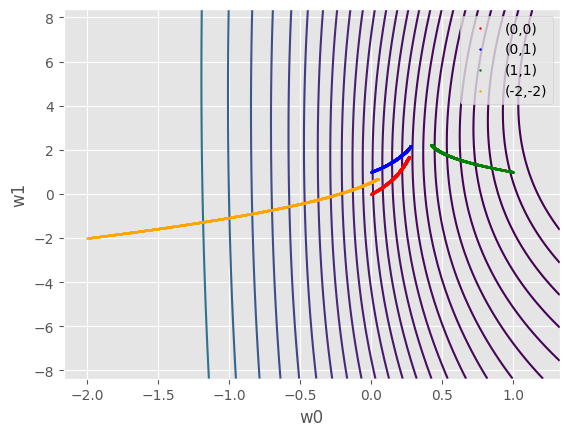

In [88]:
plt.style.use("ggplot")
plt.contour(w0vals, w1vals, cost_vals,levels = np.logspace(-1,1,30))
plt.xlabel('w0'); plt.ylabel("w1")
plt.plot(cdg00.l_w0, cdg00.l_w1, '+',color = "red",markersize = 2,label = "(0,0)")
plt.plot(cdg01.l_w0, cdg01.l_w1, '+',color = "blue",markersize = 2, label = "(0,1)")
plt.plot(cdg11.l_w0, cdg11.l_w1, '+',color = "green",markersize = 2, label = "(1,1)")
plt.plot(cdg22.l_w0, cdg22.l_w1, '+',color = "orange",markersize = 2, label = "(-2,-2)")
plt.legend()
plt.show()

Though this surface isn't visuallized as nice as the others, due to the log property, we can still see that all of our methods converge fairly well regardless of their intial data. 

#### **Sample Size Effect**

Finally, we examine the effect of sample size on the quality of our regression. We'll use a starting value of (0,0), a learning rate of 0.1 and 100 iterations to test

In [89]:
xs10,ys10 = sample(F,10)
xs50,ys50 = sample(F,50)
xs100,ys100 = sample(F,100)
xs200,ys200 = sample(F,200)
xs500,ys500 = sample(F,500)

gd10 = GD_LogR(0,0,0.1,100)
gd10.fit(xs10,ys10)

gd50 = GD_LogR(0,0,0.1,100)
gd50.fit(xs50,ys50)

gd100 = GD_LogR(0,0,0.1,100)
gd100.fit(xs100,ys100)

gd200 = GD_LogR(0,0,0.1,100)
gd200.fit(xs200,ys200)

gd500 = GD_LogR(0,0,0.1,100)
gd500.fit(xs500,ys500)

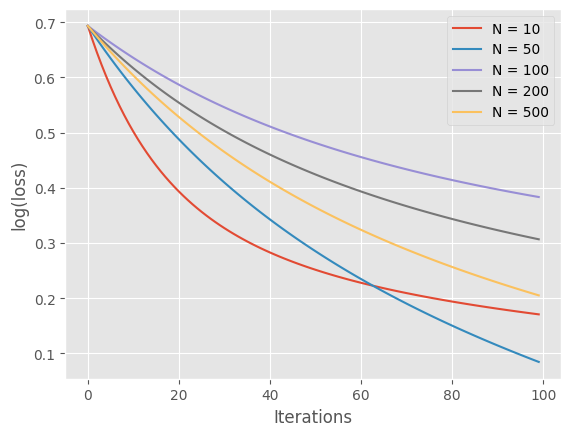

In [91]:
plt.style.use("ggplot")
plt.plot(gd10.epochs,gd10.train_loss, label = "N = 10")
plt.plot(gd50.epochs,gd50.train_loss, label = "N = 50")
plt.plot(gd100.epochs,gd100.train_loss, label = "N = 100")
plt.plot(gd200.epochs,gd200.train_loss, label = "N = 200")
plt.plot(gd500.epochs,gd500.train_loss, label = "N = 500")
plt.xlabel("Iterations")
plt.ylabel("log(loss)")
plt.legend()
plt.show()

We see different results compared to our previous regression here. We see that our regression actually performs worse with higher number of values here and better at N = 10 or N = 50. Suprisingly, however, this graph suggest that our algorithm performs better on 500 datapoints that 100 or 200 data points, which is not what we saw with simple linear regression.

**Summary**

commentary

## **Question 3)**

We now perform the same analysis as the previous question but with varying methods of gradient descent. Specifically, we examine Stochastic Gradient Descent and Momentum Gradient Descent. We will use the original function provided in question 1, along with traditional linear regression in our analysis. 

#### **Class Definition: Linear Regression with Stochastic Gradient Descent**

In [92]:
class SGD:

    def __init__(self,w0,w1,learn_rate,iterations):

        self.w0 = w0
        self.w1 = w1
        self.l_w0 = [w0]
        self.l_w1 = [w1]

        self.learn_rate = learn_rate
        self.iterations = iterations

        self.train_loss = list()
        self.test_loss = list()
        self.epochs = list()

    def loss(self,y,y_pred):
        return np.sum(np.square(y - y_pred)) / (2*len(y))

    def fit(self,xs,ys):

        # split training and testing data
        splitval = int(len(xs)*0.8)
        xs_test = xs[splitval:]
        xs = xs[:splitval]

        ys_test = ys[splitval:]
        ys = ys[:splitval]


        data = np.vstack((xs, ys))
        n = len(xs)
        
        # perform Stochastic Gradient Descent

        """ 
        Note I opted here for another variant of stochastic gradient descent.
        Instead of randomizing and running through for each epoch, we randomly select a value
        and then update based on that. This made it easier to graph cost vs iterations and gives a 
        clear representation of whats going on.
        """
        for i in range(self.iterations):

            index = np.random.randint(0,len(xs)-1)
            x = xs[index]
            y = ys[index]

            # predict y-values
            y_pred = self.w0 + self.w1*xs
            y_hat = self.w0 + self.w1*x

            # calculate loss

            # train loss
            cost = self.loss(ys,y_pred)
            self.train_loss.append(cost)

            # test loss
            cost = self.loss(ys_test,self.w0 + self.w1*xs_test)
            self.test_loss.append(cost)
                
            self.epochs.append(i)

            # calcualte gradients
            w0_deriv = (y-y_hat)
            w1_deriv = x*(y - y_hat)
                
            # update values
            self.w0 = self.w0 + self.learn_rate*w0_deriv
            self.w1 = self.w1 + self.learn_rate*w1_deriv

            self.l_w0.append(self.w0)
            self.l_w1.append(self.w1)

### **Testing**

Below we intialize the testing data that will be used throughout the section. Please not that I have set the random seed to 1 for consistency in commentary and results.

In [93]:
# target function
def F(x): 
    return np.exp(x)

# Sample Values
xs,ys = sample(F,100,1)

#### **Error Plots**

In [94]:
# n = 0.9
sgdlr09 = SGD(0,0,0.9,1000)
sgdlr09.fit(xs,ys)

# n = 0.5
sgdlr05 = SGD(0,0,0.5,1000)
sgdlr05.fit(xs,ys)

# n = 0.1
sgdlr01 = SGD(0,0,0.1,1000)
sgdlr01.fit(xs,ys)

# n = 0.05
sgdlr005 = SGD(0,0,0.05,1000)
sgdlr005.fit(xs,ys)

# n = 0.01
sgdlr001 = SGD(0,0,0.01,1000)
sgdlr001.fit(xs,ys)

#### Training Loss

Note I've plotted learning rate of 0.9 and 0.5 seperately from the others, as they perform very poorly and distort the graph. I still felt it was important to include as a notable result.

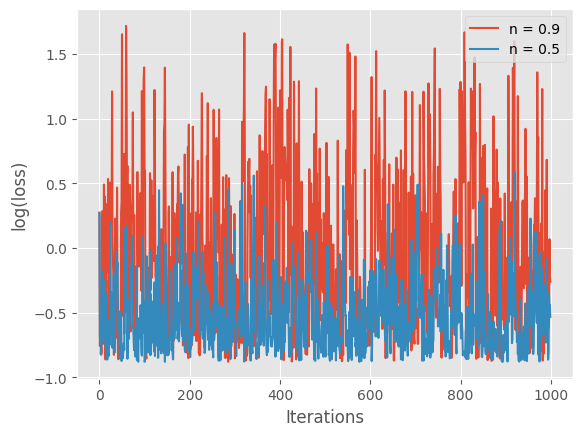

In [101]:
plt.style.use("ggplot")
plt.plot(sgdlr09.epochs,np.log(sgdlr09.train_loss), label = "n = 0.9")
plt.plot(sgdlr05.epochs,np.log(sgdlr05.train_loss), label = "n = 0.5")
plt.xlabel("Iterations")
plt.ylabel("log(loss)")
plt.legend()
plt.show()

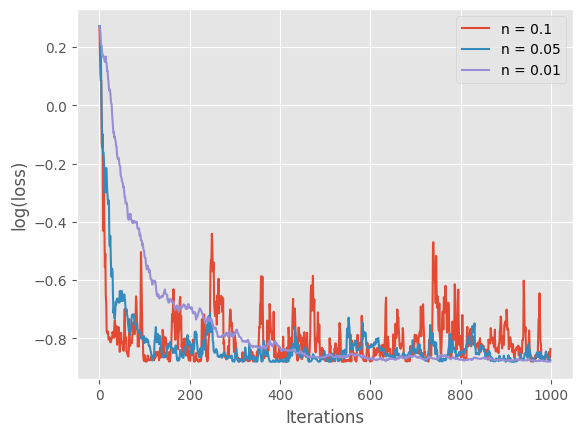

In [100]:
plt.style.use("ggplot")
plt.plot(sgdlr01.epochs,np.log(sgdlr01.train_loss), label = "n = 0.1")
plt.plot(sgdlr005.epochs,np.log(sgdlr005.train_loss), label = "n = 0.05")
plt.plot(sgdlr001.epochs,np.log(sgdlr001.train_loss), label = "n = 0.01")
plt.xlabel("Iterations")
plt.ylabel("log(loss)")
plt.legend()
plt.show()

#### Test Loss

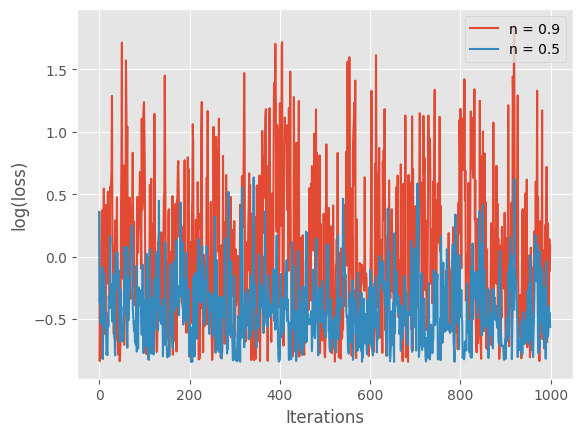

In [99]:
plt.style.use("ggplot")
plt.plot(sgdlr09.epochs,np.log(sgdlr09.test_loss), label = "n = 0.9")
plt.plot(sgdlr05.epochs,np.log(sgdlr05.test_loss), label = "n = 0.5")
plt.xlabel("Iterations")
plt.ylabel("log(loss)")
plt.legend()
plt.show()

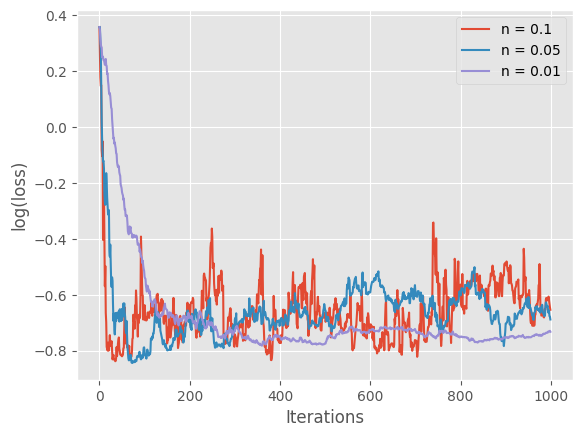

In [98]:
plt.style.use("ggplot")
plt.plot(sgdlr01.epochs,np.log(sgdlr01.test_loss), label = "n = 0.1")
plt.plot(sgdlr005.epochs,np.log(sgdlr005.test_loss), label = "n = 0.05")
plt.plot(sgdlr001.epochs,np.log(sgdlr001.test_loss), label = "n = 0.01")
plt.xlabel("Iterations")
plt.ylabel("log(loss)")
plt.legend()
plt.show()

#### **Contour Plot**

For this analysis, we'll use a learning rate of 0.01, 1000 samples and 1000 iterations.

Data

In [102]:
# intialize different starting values
cdg00 = SGD(w0 = 0,w1 = 0,learn_rate = 0.01,iterations = 1000)
cdg01 = SGD(w0 = 0,w1 = 1,learn_rate = 0.01,iterations = 1000)
cdg55 = SGD(w0 = 5,w1 = 5,learn_rate = 0.01,iterations = 1000)
cdg44 = SGD(w0 = -4,w1 = -4,learn_rate = 0.01,iterations = 1000)

# fit regressions
cdg00.fit(xs,ys)
cdg01.fit(xs,ys)
cdg55.fit(xs,ys)
cdg44.fit(xs,ys)

# define cost function
def cost(w0,w1,xs,ys):
    y_pred = w0 + w1*xs
    return np.sum((ys - y_pred)**2) / (2*len(ys))

# get final values from first iteration to create grid
w0vals = np.linspace(-5*sgdlr001.w0,5*sgdlr001.w0,100)
w1vals = np.linspace(-5*sgdlr001.w1,5*sgdlr001.w1,100)
cost_vals = np.zeros((len(w0vals), len(w1vals)))

# get cost values over grid
c1=0; c2=0
for i in w0vals:
    for j in w1vals:
        cost_vals[c1][c2] = cost(i,j,xs,ys)
        c2=c2+1
    c1=c1+1
    c2=0

Plot

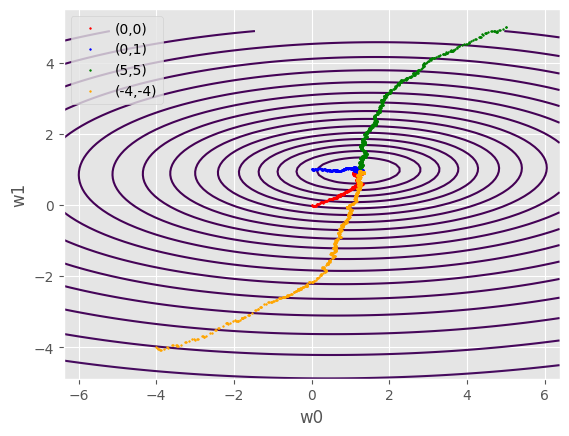

In [105]:
plt.style.use("ggplot")
plt.contour(w0vals, w1vals, cost_vals,levels = np.logspace(-2,3,50))
plt.xlabel('w0'); plt.ylabel("w1")
plt.plot(cdg00.l_w0, cdg00.l_w1, '+',color = "red",markersize = 2,label = "(0,0)")
plt.plot(cdg01.l_w0, cdg01.l_w1, '+',color = "blue",markersize = 2, label = "(0,1)")
plt.plot(cdg55.l_w0, cdg55.l_w1, '+',color = "green",markersize = 2, label = "(5,5)")
plt.plot(cdg44.l_w0, cdg44.l_w1, '+',color = "orange",markersize = 2, label = "(-4,-4)")
plt.legend()
plt.show()

**Summary**

comments here

#### **Class Definition: Linear Regression with Momentum Gradient Descent**

In [106]:
class SGD_MOM:

    def __init__(self,w0,w1,learn_rate,decay,iterations):
        
        self.w0 = w0
        self.w1 = w1
        self.l_w0 = [w0]
        self.l_w1 = [w1]

        self.prevw0 = 0
        self.prevw1 = 0

        self.learn_rate = learn_rate
        self.decay = decay
        self.iterations = iterations
        self.train_loss = list()
        self.test_loss = list()
        self.epochs = list()

    def loss(self,y,y_pred):
        # calculate the loss on between predicted and true values.
        return np.sum(np.square(y - y_pred)) / (2*len(y))
    
    def fit(self,xs,ys):

        # split training and testing data
        splitval = int(len(xs)*0.8)
        xs_test = xs[splitval:]
        xs = xs[:splitval]

        ys_test = ys[splitval:]
        ys = ys[:splitval]
        
        
        # Perform Stochastic Gradient Descent with Momentum Added
        """ 
        Note I opted here for another variant of stochastic gradient descent.
        Instead of randomizing and running through for each epoch, we randomly select a value
        and then update based on that. This made it easier to graph cost vs iterations and gives a 
        clear representation of whats going on.
        """
        for i in range(self.iterations):

            index = np.random.randint(0,len(xs)-1)
            x = xs[index]
            y = ys[index]

            # predict y-values
            y_pred = self.w0 + self.w1*xs
            y_hat = self.w0 + self.w1*x

            # calculate loss

            # train loss
            cost = self.loss(ys,y_pred)
            self.train_loss.append(cost)

            # test loss
            cost = self.loss(ys_test,self.w0 + self.w1*xs_test)
            self.test_loss.append(cost)
                
            self.epochs.append(i)

            # calcualte gradients
            w0_deriv = self.decay*self.prevw0 - self.learn_rate*(y-y_hat)
            w1_deriv = self.decay*self.prevw1 - self.learn_rate*(y - y_hat)*x
                
            # update values
            self.w0 = self.w0 - w0_deriv
            self.w1 = self.w1 - w1_deriv

            self.prevw0 = w0_deriv
            self.prevw1 = w1_deriv

            self.l_w0.append(self.w0)
            self.l_w1.append(self.w1)

#### **Error Plots**

Note that we will use a decay rate of 0.9 throughout the testing. After doing some reading, this is a commonly agreed upon value for the decay rate.

In [110]:
# target function
def F(x): 
    return np.exp(x)

# Sample Values
xs,ys = sample(F,100,1)

In [111]:
# n = 0.9
sgdmlr09 = SGD_MOM(0,0,0.9,0.9,1000)
sgdmlr09.fit(xs,ys)

# n = 0.5
sgdmlr05 = SGD_MOM(0,0,0.5,0.9,1000)
sgdmlr05.fit(xs,ys)

# n = 0.1
sgdmlr01 = SGD_MOM(0,0,0.1,0.9,1000)
sgdmlr01.fit(xs,ys)

# n = 0.05
sgdmlr005 = SGD_MOM(0,0,0.05,0.9,1000)
sgdmlr005.fit(xs,ys)

# n = 0.01
sgdmlr001 = SGD_MOM(0,0,0.01,0.9,1000)
sgdmlr001.fit(xs,ys)

#### Training Loss

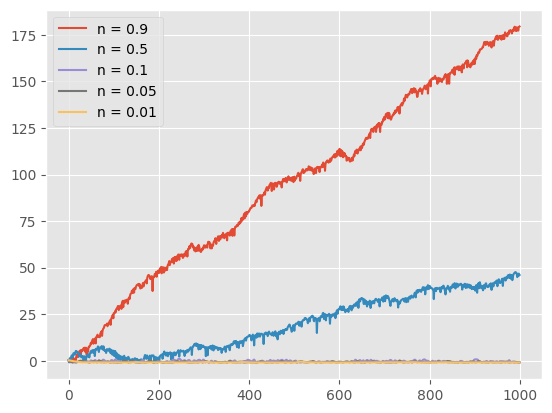

In [112]:
plt.style.use("ggplot")
plt.plot(sgdmlr09.epochs,np.log(sgdmlr09.train_loss), label = "n = 0.9")
plt.plot(sgdmlr05.epochs,np.log(sgdmlr05.train_loss), label = "n = 0.5")
plt.plot(sgdmlr01.epochs,np.log(sgdmlr01.train_loss), label = "n = 0.1")
plt.plot(sgdmlr005.epochs,np.log(sgdmlr005.train_loss), label = "n = 0.05")
plt.plot(sgdmlr001.epochs,np.log(sgdmlr001.train_loss), label = "n = 0.01")
plt.legend()
plt.show()

#### Test Loss

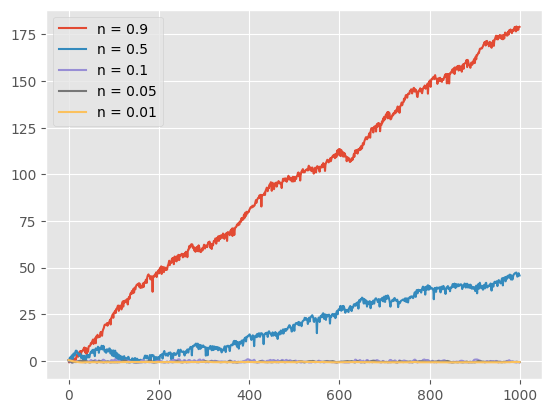

In [115]:
plt.style.use("ggplot")
plt.plot(sgdmlr09.epochs,np.log(sgdmlr09.test_loss), label = "n = 0.9")
plt.plot(sgdmlr05.epochs,np.log(sgdmlr05.test_loss), label = "n = 0.5")
plt.plot(sgdmlr01.epochs,np.log(sgdmlr01.test_loss), label = "n = 0.1")
plt.plot(sgdmlr005.epochs,np.log(sgdmlr005.test_loss), label = "n = 0.05")
plt.plot(sgdmlr001.epochs,np.log(sgdmlr001.test_loss), label = "n = 0.01")
plt.legend()
plt.show()

commentary

#### **Contour Plot**

Data

In [119]:
cdg00 = SGD_MOM(w0 = 0,w1 = 0,learn_rate = 0.01,decay = 0.9,iterations = 100)
cdg01 = SGD_MOM(w0 = 0,w1 = 1,learn_rate = 0.01,decay = 0.9,iterations = 100)
cdg55 = SGD_MOM(w0 = 5,w1 = 5,learn_rate = 0.01,decay = 0.9,iterations = 100)
cdg44 = SGD_MOM(w0 = -4,w1 = -4,learn_rate = 0.01,decay = 0.9,iterations = 100)

cdg00.fit(xs,ys)
cdg01.fit(xs,ys)
cdg55.fit(xs,ys)
cdg44.fit(xs,ys)

# define cost function
def cost(w0,w1,xs,ys):
    y_pred = w0 + w1*xs
    return np.sum((ys - y_pred)**2) / (2*len(ys))

# get final values from first iteration to create grid
w0vals = np.linspace(-5*sgdmlr001.w0,5*sgdmlr001.w0,100)
w1vals = np.linspace(-5*sgdmlr001.w1,5*sgdmlr001.w1,100)
cost_vals = np.zeros((len(w0vals), len(w1vals)))

# get cost values over grid
c1=0; c2=0
for i in w0vals:
    for j in w1vals:
        cost_vals[c1][c2] = cost(i,j,xs,ys)
        c2=c2+1
    c1=c1+1
    c2=0


Plot

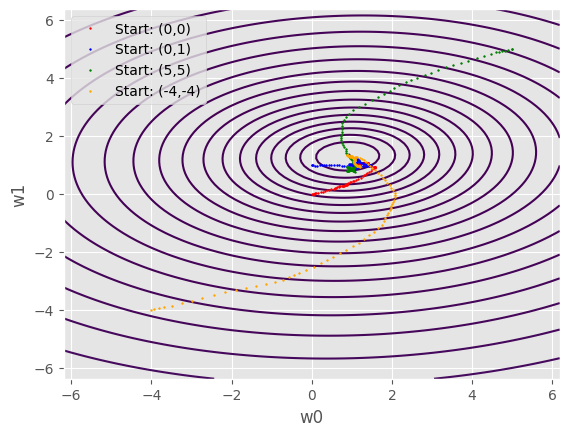

In [121]:
plt.style.use("ggplot")
plt.contour(w0vals, w1vals, cost_vals,levels = np.logspace(-2,3,50))
plt.xlabel('w0'); plt.ylabel("w1")
plt.plot(cdg00.l_w0, cdg00.l_w1, '+',color = "red",markersize = 2,label = "Start: (0,0)")
plt.plot(cdg01.l_w0, cdg01.l_w1, '+',color = "blue",markersize = 2, label = "Start: (0,1)")
plt.plot(cdg55.l_w0, cdg55.l_w1, '+',color = "green",markersize = 2, label = "Start: (5,5)")
plt.plot(cdg44.l_w0, cdg44.l_w1, '+',color = "orange",markersize = 2, label = "Start: (-4,-4)")
plt.legend()
plt.show()

commentary

**Could also add something on size here

## **Question 4)**

In this question, we implement a 2 layer neural network and examine its behaviour under varying parameters such as, the activiation function, the target function, the width of the hidden layer, and the size of the training set.

#### **Class Definition: 2-Layer Neural Network**

### **Testing**

As before, we initialize some testing data for the various functions. Again, I've set the seed to 1 for consitency.